# 12-Day Program Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the data

In [2]:
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

## Day 4

### Part 1
#### How many different companies are represented in the data set?

In [4]:
print(sum(data['Company Name'].duplicated()), ' companies have the same name. If I remove duplicated names, we are looking at', len(set(data['Company Name'])))
print(' But total number of presented companies in the dataset is', len(data))

11  companies have the same name. If I remove duplicated names, we are looking at 439
 But total number of presented companies in the dataset is 450


### Part 2
#### What is the total number of jobs created for businesses in Queens?

In [7]:
queens = data.groupby(by = ['City']).get_group('Queens')
print('Total number of jobs created by companies in Queens is', int(queens['Job created'].sum()))

Total number of jobs created by companies in Queens is 90.0


### Part 3
#### How many different unique email domains names are there in the data set?

In [8]:
domain = []
for email in data['company email'].dropna():
    if len(email.split('@')) == 1: # removing invalid email addresses
        continue
    domain.append(email.split('@')[1].lower())
print('Number of unique email domains:', len(set(domain)))

Number of unique email domains: 356


### Part 4
#### Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

Extracting each company's separate NTA:

In [11]:
data['NTA_split'] = data['NTA'].str.split('-')
data = data.explode('NTA_split')

In [12]:
NTA_count = data.groupby(by = 'NTA_split')['Company Name'].count()
NTA_count.drop(NTA_count[NTA_count<5].index, inplace = True)

Creating a dataset where each NTA has at least 5 entries

In [14]:
df = data.drop(data[~data['NTA_split'].isin(list(NTA_count.index))].index)

Adding group-level statistics to the dataframe

In [16]:
pd.options.mode.chained_assignment = None # supressing warning
df['avg_saving'] = df.groupby(by = 'NTA_split')['Total Savings'].transform('mean') # average savings
df['total_job_created'] = df.groupby(by = 'NTA_split')['Job created'].transform('sum') # total job created for each NTA

### Part 5
#### Save your result for the previous question as a CSV file.

In [17]:
df.to_csv('12_days_day_4.csv')

## Day 5
#### Using the same data set and results that you were working with in the pandas action items section (Day 4), create a

### Part 2
#### scatter plot of jobs created versus average savings.

In [18]:
x = df['total_job_created']
y = df['avg_saving']

Standard Scale

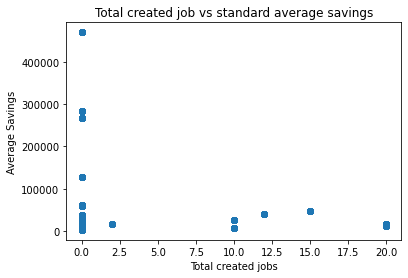

In [22]:
plt.scatter(x,y)
plt.xlabel('Total created jobs')
plt.ylabel('Average Savings')
plt.title('Total number of created job vs standard average savings')
plt.show()

Logarithmic Scale

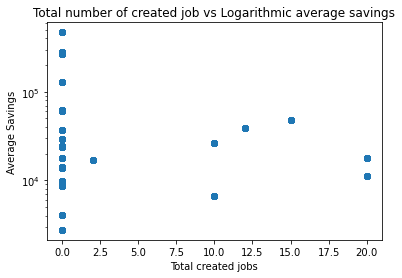

In [24]:
plt.yscale('log')
plt.scatter(x,y)
plt.xlabel('Total created jobs')
plt.ylabel('Average Savings')
plt.title('Total number of created job vs Logarithmic average savings')
plt.show()

#### Histogram of the log of the average total savings.

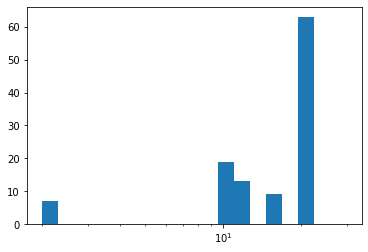

In [40]:
plt.hist(x, bins = np.logspace(start = np.log10(2), stop = np.log10(30), num =20))
plt.gca().set_xscale('log')

#### Line plot of the total jobs created for each month.

Creating the dataset we want to plot

In [41]:
print(df[df['Effective Date']== np.datetime64('NaT')].index) # Check to see if we have invalid entries

Int64Index([], dtype='int64')


In [42]:
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
df['Effective Month'] = df['Effective Date'].dt.month

In [43]:
y = df.groupby(by = 'Effective Month')['total_job_created'].sum()

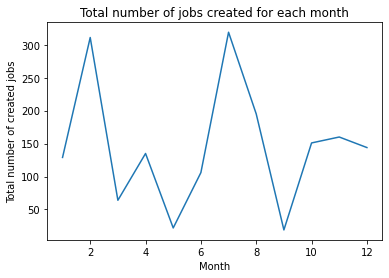

In [44]:
plt.plot(y.index, y)
plt.xlabel('Month')
plt.ylabel('Total number of created jobs')
plt.title('Total number of jobs created for each month')
plt.show()